# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39219.60
The current value of your 5.3 ETH is $10474.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
ts = pd.Timestamp("2021-06-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=ts,
    end=ts
).df
# Preview DataFrame
# YOUR CODE HERE!
ticker_data.head()

AGG                                        SPY  \
                             open    high      low     close   volume   open   
time                                                                           
2021-06-21 00:00:00-04:00  115.06  115.12  114.921  115.0759  2525438  416.8   

                                                              
                             high     low    close    volume  
time                                                          
2021-06-21 00:00:00-04:00  420.39  415.93  420.005  31316833

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = ticker_data['AGG']['close'].item()
spy_close_price = ticker_data['SPY']['close'].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.0759
Current SPY closing price: $420.005


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21000.25
The current value of your 200 AGG shares is $23015.18


### Savings Health Analysis

In [16]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
crypto_amount = my_btc_value + my_eth_value
share_amount = my_agg_value + my_spy_value
amounts = {"Amount": [round(crypto_amount, 2), round(share_amount, 2)]}
df_savings = pd.DataFrame(amounts, index=["Crypto", "Shares"])
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,49694.10
Shares,44015.43


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

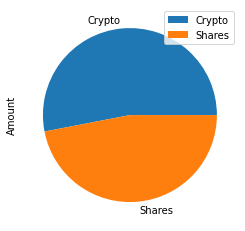

In [18]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', subplots=True)

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum().item()

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations for reaching this financial goal.")
else:
    print(f"You are $ {emergency_fund - total_savings} away from reaching the goal.")

Congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [41]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-20', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-27 00:00:00-05:00  117.6100  117.67  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2021-01-27 00:00:00-05:00  380.22  380.32  372.0100  374.44   99246554  
2021-01-28 00:00:00-05:00  376.36  381.93  375.8900  377.60   75229306  
2021-01-29 00:00:00-05:00  375.63  376.67  368.2700  370.19  106397082  
2021-02-01 00:00:00-05:00  373.72  377.34  370.3760  376.18   64056510  
2021-02-02 00:00:00-05:00  379.65  383.22  376.3181  381.54   53979346

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [44]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty.portfolio_data.head()

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-27 00:00:00-05:00  117.6100  117.67  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-01-27 00:00:00-05:00          NaN  380.22  380.32  372.0100  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.93  375.8900  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.67  368.2700  370.19   
2021-02-01 00:00:00-05:00    -0.000938  373.72  377.34  370.3760  376.18   
2021-02-02 00:00:00-05:00    -0.001365  379.65  383.22  376.3181  381.54   

                                                   
                              volume daily_return  
time                                               
2021-01-27 00:00:00-05:00   99246554          NaN  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  
2021-02-01 00:00:00-05:00   64056510     0.016181  
2021-02-02 00:00:00-05:00   53979346     0.014248

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002200,0.997232,1.001585,0.997707,1.009187,1.004742,1.000299,0.998068,1.003621,0.999832,...,0.994679,0.993784,1.011524,1.002185,0.998140,1.005504,1.003584,0.998384,1.004295,0.993748
2,1.002032,1.007564,1.002334,0.995389,1.018009,1.008208,1.006379,1.001518,0.999931,1.000786,...,0.995923,0.990412,1.010260,0.995752,0.998489,1.017696,1.001923,0.999880,1.006651,0.986829
3,1.000456,1.000471,0.996970,0.986439,1.020408,1.012033,1.012098,0.991458,1.007248,0.999336,...,0.999077,0.988217,1.006725,0.996935,1.004011,1.015536,1.007239,1.002394,1.011261,0.982334
4,1.008727,0.999772,0.990437,0.986922,1.010247,1.006754,1.014508,0.988690,1.009069,1.000489,...,0.995655,0.987794,1.005501,0.997389,1.001431,1.015985,1.007436,0.997038,1.008314,0.971658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,137.825779,59.051471,58.472834,61.609340,50.384513,167.366234,43.904082,108.867874,74.507504,45.730195,...,39.874384,62.162658,88.415258,158.204659,86.154763,136.728563,129.051117,48.547143,36.020049,108.334496
7557,137.375339,59.074388,58.288638,62.361872,50.480225,168.459031,43.835952,108.819632,74.807001,46.135897,...,40.009245,62.201972,88.735996,158.040939,86.128779,138.090778,128.906390,48.707011,36.274656,108.989656
7558,137.670602,59.152531,58.610148,62.390729,50.444664,167.926848,43.850338,108.333338,74.317200,46.007727,...,39.813965,61.889872,88.661462,157.168664,85.486748,138.339058,129.380179,48.554459,36.173144,108.621913
7559,138.838247,59.666191,58.535412,62.437132,50.392055,168.844276,43.752707,108.035833,74.313866,45.835516,...,40.223193,61.990552,88.347293,158.569318,85.755633,138.187754,130.022093,48.725778,36.120626,108.533225


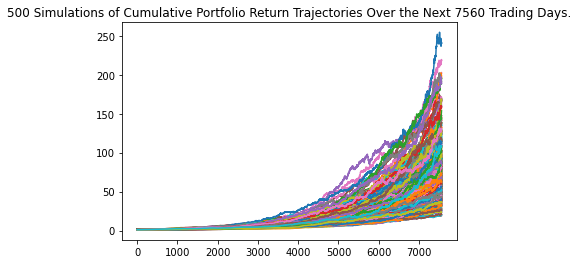

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty.plot_simulation()

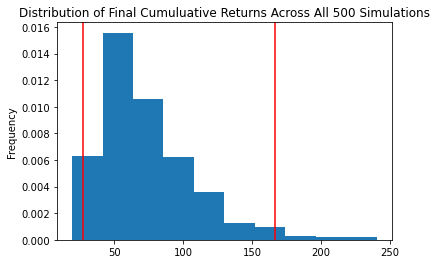

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             72.659195
std              34.321723
min              19.325474
25%              48.573070
50%              64.439689
75%              88.292109
max             240.217644
95% CI Lower     27.431182
95% CI Upper    166.602180
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $548623.64 and $3332043.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $822935.46 and $4998065.39
